<h1>Librerias 

In [15]:
# 1. Importartacion de librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [5]:
Titanic = pd.read_csv('Titanic-Dataset.csv')

<h1>Analisis Exploratorio De los Datos 

In [8]:
# imprimir los datos para obtener una mayor aclaracion exploratoria 

print("Primeras filas del dataset:")
display(Titanic.head())

print("\nInformación del dataset:")
Titanic.info()

print("\nDescripción estadística:")
display(Titanic.describe())

Primeras filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Descripción estadística:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


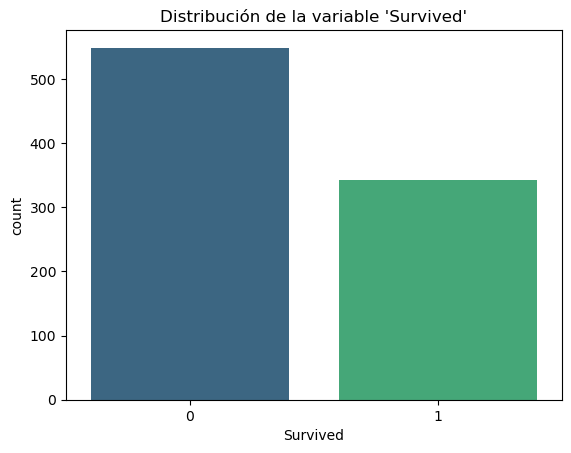

In [10]:
# Distribución de la variable objetivo
sns.countplot(data=Titanic, x="Survived", hue="Survived", dodge=False, palette="viridis", legend=False)
plt.title("Distribución de la variable 'Survived'")
plt.show()

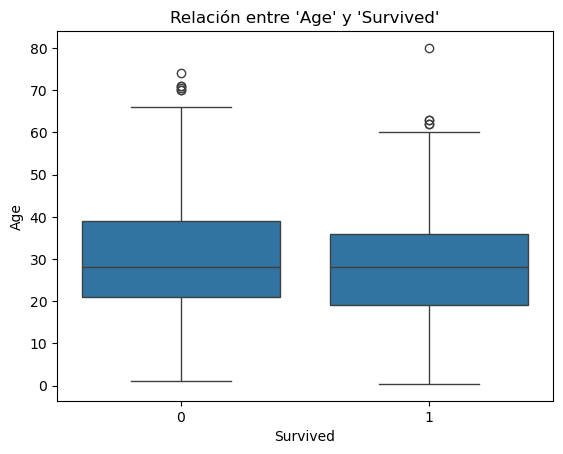

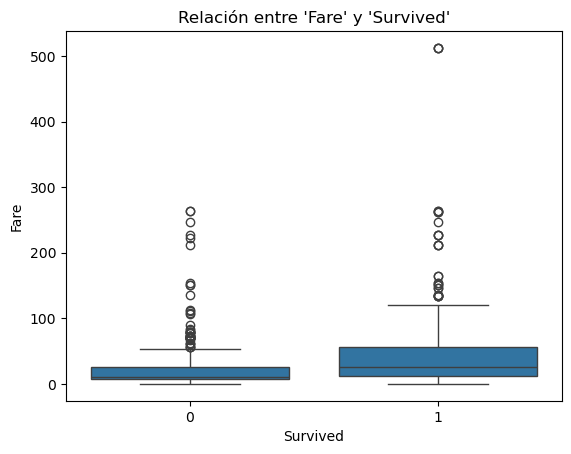

In [12]:
# Boxplot para analizar relaciones entre 'Age' y 'Survived'
sns.boxplot(data=Titanic, x="Survived", y="Age")
plt.title("Relación entre 'Age' y 'Survived'")
plt.show()

# Boxplot para analizar relaciones entre 'Fare' y 'Survived'
sns.boxplot(data=Titanic, x="Survived", y="Fare")
plt.title("Relación entre 'Fare' y 'Survived'")
plt.show()

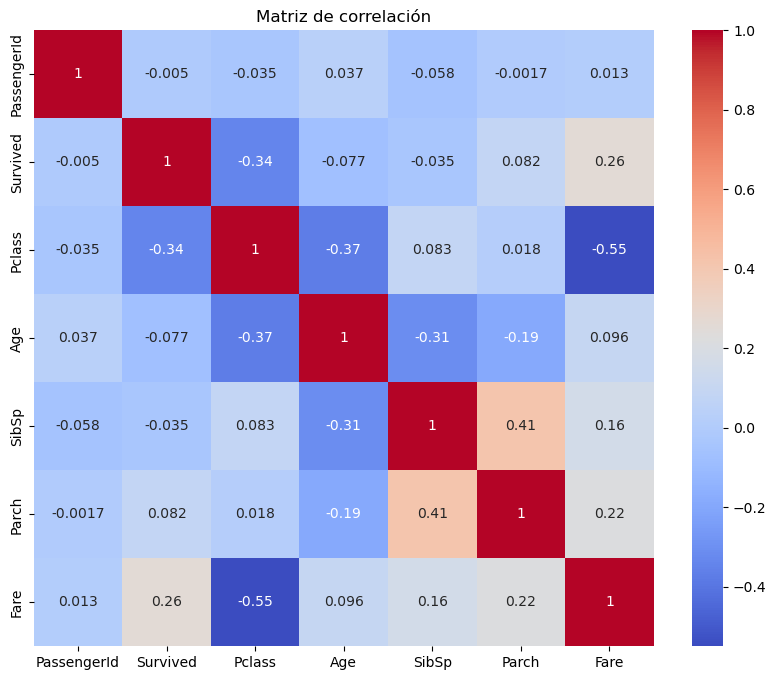

In [18]:
# columnas numericas en matriz de correlación
numeric_columns = Titanic.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

<h1>Preprocesamiento de Datos 

In [20]:
# Tratar valores faltantes
print("\nValores faltantes por columna:")
print(Titanic.isnull().sum())


Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [28]:
# 1. Imputar valores faltantes en 'Age' con la mediana por supervivencia
Titanic['Age'] = Titanic.groupby('Survived')['Age'].transform(lambda x: x.fillna(x.median()))

# 2. Si la columna 'Cabin' está presente, rellenar valores faltantes con 'Unknown'
if 'Cabin' in Titanic.columns:
    Titanic['Cabin'] = Titanic['Cabin'].fillna('Unknown')

# 3. Eliminar columnas irrelevantes si están presentes
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
Titanic.drop(columns=[col for col in columns_to_drop if col in Titanic.columns], inplace=True)

# 4. Verificar si hay valores faltantes después del preprocesamiento
print("\nValores faltantes después del preprocesamiento:")
print(Titanic.isnull().sum())


Valores faltantes después del preprocesamiento:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


<h1>Selección de Caracteristicas 

In [30]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

X = Titanic[features]
y = Titanic[target]

print("Primeras filas de X (características):")
print(X.head())

print("\nPrimeras filas de y (variable objetivo):")
print(y.head())

Primeras filas de X (características):
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True

Primeras filas de y (variable objetivo):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


<h1>División del Dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train)
print(y_test)

     Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
692       3  28.0      0      0   56.4958      True       False        True
481       2  28.0      0      0    0.0000      True       False        True
527       1  28.0      0      0  221.7792      True       False        True
855       3  18.0      0      1    9.3500     False       False        True
801       2  31.0      1      1   26.2500     False       False        True
..      ...   ...    ...    ...       ...       ...         ...         ...
359       3  28.0      0      0    7.8792     False        True       False
258       1  35.0      0      0  512.3292     False       False       False
736       3  48.0      1      3   34.3750     False       False        True
462       1  47.0      0      0   38.5000      True       False        True
507       1  28.0      0      0   26.5500      True       False        True

[712 rows x 8 columns]
565    0
160    0
553    1
860    0
241    1
      ..
880    1
9

<h1> Entrenamiento de modelo 

In [34]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

<h1>Evaluación del Modelo

In [36]:
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Evaluación:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Métricas de Evaluación:
Accuracy: 0.80
Precision: 0.79
Recall: 0.67
F1-Score: 0.72

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



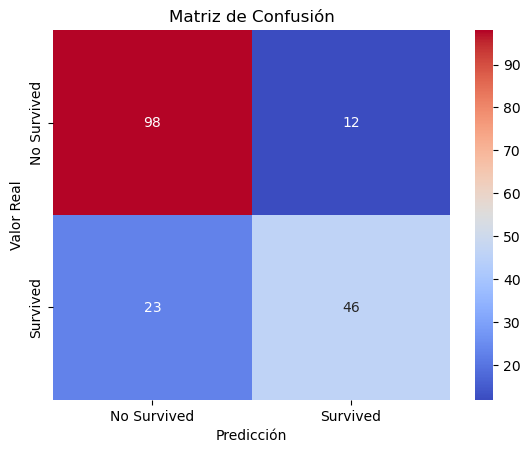

In [37]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm", xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

<h1>Visualización de Resultados 

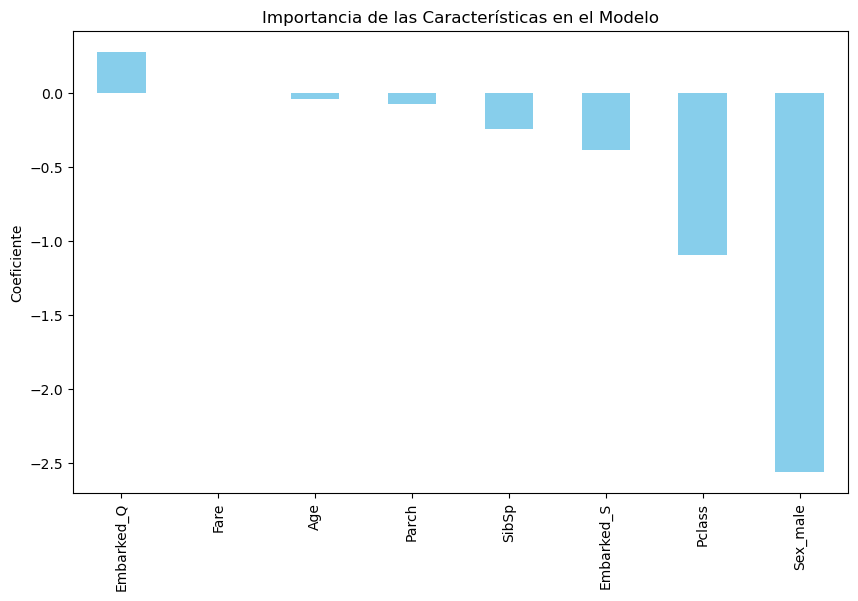

In [38]:
# Importancia de las características
coefficients = pd.Series(model.coef_[0], index=features)
coefficients.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Importancia de las Características en el Modelo")
plt.ylabel("Coeficiente")
plt.show()

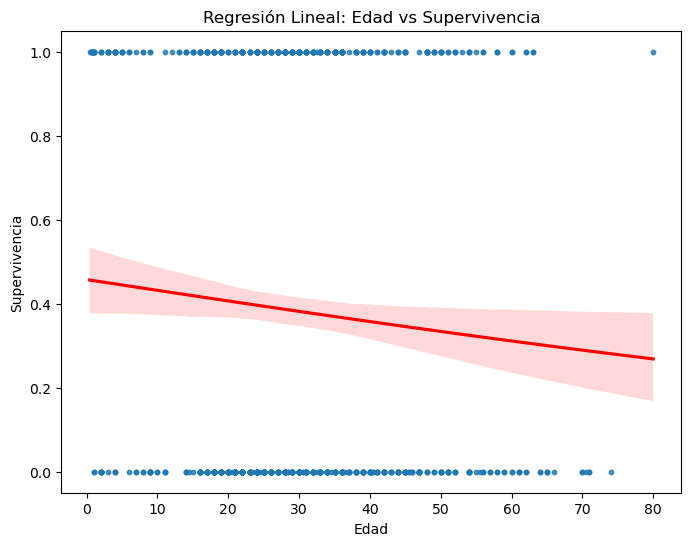

In [42]:
# Visualización de regresión lineal entre 'Age' y 'Survived'
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Survived', data=Titanic, logistic=True, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Regresión Lineal: Edad vs Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Supervivencia')
plt.show()

<h1>
Interpretación de los Resultados


Distribución de la variable 'Survived':
La distribución muestra que el número de personas que sobrevivieron es menor que el número de personas que no sobrevivieron, lo que indica que la mayoría de los pasajeros no sobrevivieron al desastre del Titanic. Este es un hallazgo importante, ya que la supervivencia es la variable objetivo y debemos tener en cuenta este desequilibrio para la evaluación del modelo.

Relación entre 'Age' y 'Survived':

El gráfico de caja muestra que los pasajeros más jóvenes (con edades más bajas) tienen una mayor probabilidad de supervivencia en comparación con los pasajeros más mayores. Esta información podría ser útil al identificar patrones de sobrevivientes en función de la edad.

Relación entre 'Fare' y 'Survived':

Los pasajeros que pagaron tarifas más altas (Fare) parecen tener una mayor probabilidad de supervivencia. Esto sugiere que aquellos que viajaban en clases más altas, probablemente en las cubiertas de primera clase, tenían más probabilidades de sobrevivir.

Matriz de correlación:

La matriz de correlación muestra que existen relaciones entre algunas variables, por ejemplo, una correlación moderada entre Pclass (clase del pasajero) y Fare (tarifa pagada). Sin embargo, no hay una correlación significativa con la variable objetivo Survived. Esto indica que la relación entre las características individuales y la supervivencia no es lineal y puede requerir un modelo más complejo para captar patrones no evidentes.

Evaluación del modelo (Regresión Logística):

La precisión del modelo, que es 0.79, indica que el modelo clasifica correctamente el 79% de los casos. Esto sugiere que el modelo tiene un desempeño relativamente bueno, aunque no perfecto, debido a la naturaleza desequilibrada de la variable objetivo.

El recall de 0.69 indica que el modelo identifica correctamente el 69% de los casos de sobrevivientes, lo que muestra que tiene una capacidad decente para detectar personas que sobrevivieron.

El F1-score de 0.75 es una métrica balanceada entre la precisión y el recall. Esto es importante para medir la capacidad del modelo de hacer buenas predicciones, no solo de clasificar correctamente, sino también de identificar correctamente los casos positivos.

La matriz de confusión nos muestra que el modelo cometió algunos errores en la clasificación de sobrevivientes (falsos negativos), lo que es comprensible dado el desequilibrio en las clases.

Visualización de la regresión lineal (Age vs Survived):

La visualización de regresión logística entre Age y Survived muestra cómo la probabilidad de supervivencia cambia con la edad. Observamos que a medida que la edad aumenta, la probabilidad de supervivencia disminuye, lo cual podría estar relacionado con la prioridad de evacuación que se dio a ciertos grupos de edad (por ejemplo, niños y mujeres).